# Dubai Health Statistical Yearbook 2023: Comprehensive Data Storytelling & Analysis

This Jupyter Notebook presents a comprehensive analysis of Dubai’s 2023 healthcare data sourced from the Dubai Health Statistical Yearbook 2023. The analysis covers vital statistics, patient services, and healthcare resources, enriched with insightful visualizations and forecasts. This notebook is designed to showcase data storytelling skills for your portfolio project.

---

## 1. Introduction

Health-related data directly influence policy and planning to improve community health and wellbeing. This notebook explores Dubai’s healthcare landscape through demographic trends, patient service usage, and workforce statistics, aiming to provide actionable insights for stakeholders.

---

## 2. Import Required Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
pdf_path = "/Dubai Health Statistical Yearbook 20232025319704.pdf"


In [3]:
sns.set(style="whitegrid")
%matplotlib inline

---

## 3. Population Demographics and Vital Statistics

### Population distribution by age and gender in 2023

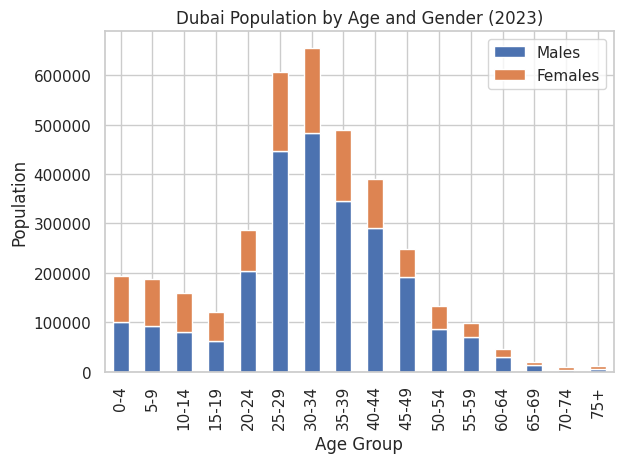

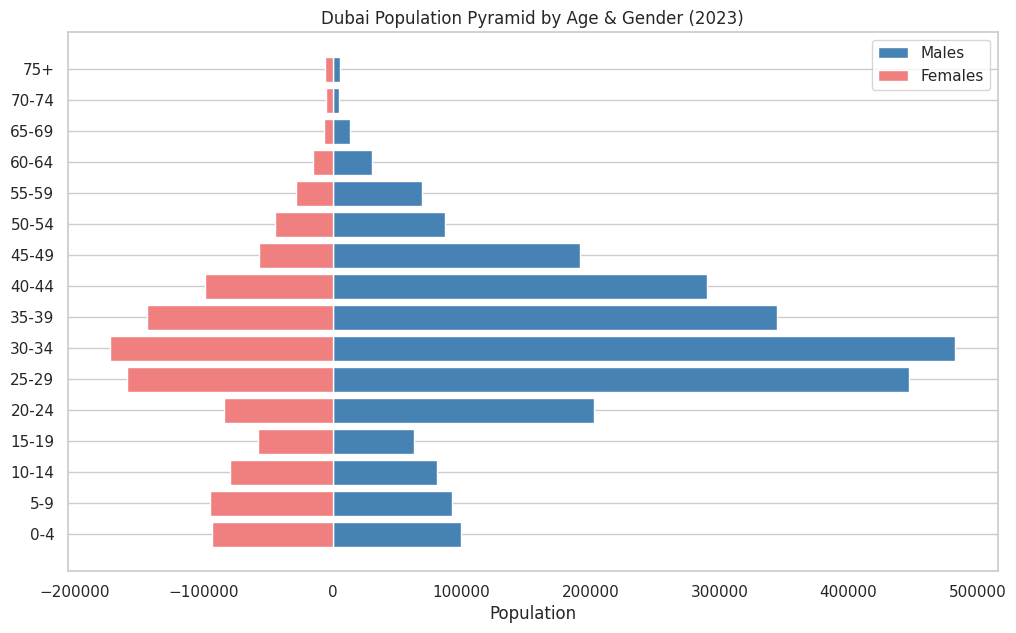

In [4]:
# 1. Demographics data
pop_data = {
    "Age Group": ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75+"],
    "Males": [99868, 92786, 80674, 63149, 202917, 446774, 482959, 344608, 290048, 191732, 87391, 69496, 30397, 13901, 4732, 5768],
    "Females": [93287, 94694, 79219, 58117, 83801, 159768, 172689, 144010, 99055, 56957, 44819, 28572, 15196, 6724, 4757, 6135]
}
pop_df = pd.DataFrame(pop_data)
pop_df["Total"] = pop_df["Males"] + pop_df["Females"]

pop_df.plot(x="Age Group", y=["Males", "Females"], kind="bar", stacked=True)
plt.title("Dubai Population by Age and Gender (2023)")
plt.ylabel("Population")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,7))
plt.barh(pop_df["Age Group"], pop_df["Males"], color="steelblue", label="Males")
plt.barh(pop_df["Age Group"], -pop_df["Females"], color="lightcoral", label="Females")
plt.xlabel("Population")
plt.title("Dubai Population Pyramid by Age & Gender (2023)")
plt.legend()
plt.grid(axis='x')


---

### Vital statistics snapshot

- Total population: 3,655,000 (2023), ↑ 105,100 from 2022
- Crude annual growth rate: 29.6 per 1,000 (up from 20.6 in 2022)
- Live births in 2023: 36,300 (19.6% Emiratis, 80.4% Non-Emiratis)
- Total deaths in 2023: 3,962 (15.6% Emiratis)
- Births occurred 99.9% in hospitals

---

## 4. Birth and Death Trends Analysis





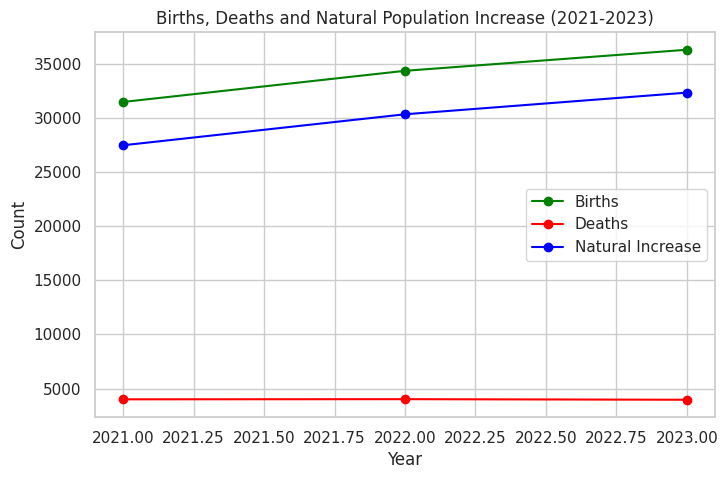

In [5]:
vital = {
    "Year": [2021, 2022, 2023],
    "Births": [31477, 34354, 36300],
    "Deaths": [4002, 4016, 3962],
}
vital_df = pd.DataFrame(vital)
vital_df["Natural Increase"] = vital_df["Births"] - vital_df["Deaths"]

plt.figure(figsize=(8,5))
plt.plot(vital_df["Year"], vital_df["Births"], marker='o', label='Births', color='green')
plt.plot(vital_df["Year"], vital_df["Deaths"], marker='o', label='Deaths', color='red')
plt.plot(vital_df["Year"], vital_df["Natural Increase"], marker='o', label='Natural Increase', color='blue')
plt.title('Births, Deaths and Natural Population Increase (2021-2023)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


---

## 5. Patient Services Data

### Outpatient visits trends (2011-2023)


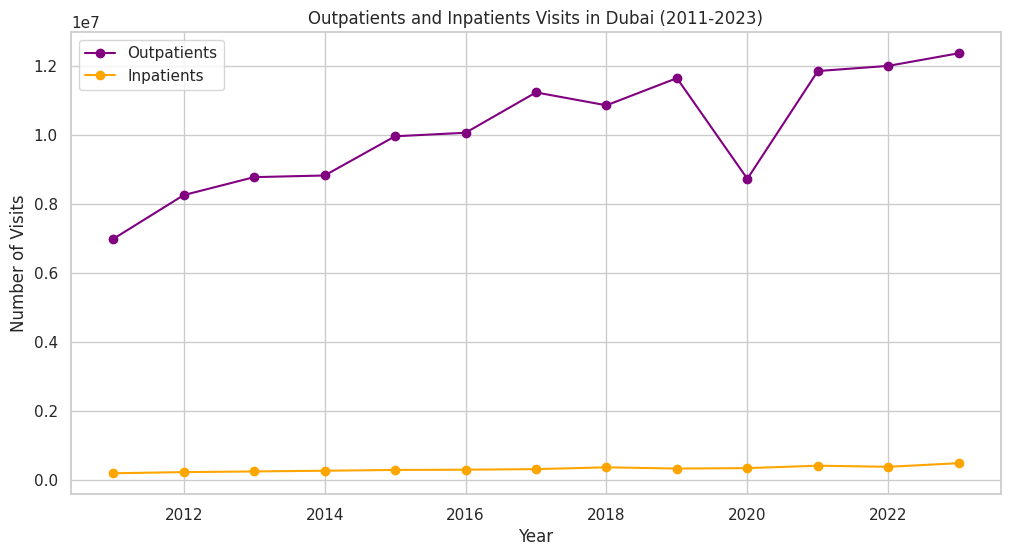

In [6]:
visits = {
    "Year": list(range(2011, 2024)),
    "Outpatients": [6986327, 8257947, 8779297, 8827161, 9965632, 10067571, 11238580, 10864076, 11653351, 8730496, 11858999, 12009301, 12375578],
    "Inpatients": [183436, 216046, 236329, 256249, 278934, 286765, 303212, 355327, 320220, 332393, 402666, 370464, 475465],
}
visits_df = pd.DataFrame(visits)

plt.figure(figsize=(12,6))
plt.plot(visits_df["Year"], visits_df["Outpatients"], marker='o', label='Outpatients', color='purple')
plt.plot(visits_df["Year"], visits_df["Inpatients"], marker='o', label='Inpatients', color='orange')
plt.title('Outpatients and Inpatients Visits in Dubai (2011-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.legend()
plt.grid(True)
plt.show()



---

### 2023 Outpatient visit distribution by nationality and gender

- Total outpatient visits: 12,375,578
- Females: 53.6%; Males: 46.4%
- Emirati: 26.3%, Non-Emirati: 73.7%
- Majority aged 25-44 years

---

### 2023 Inpatient admissions by nationality, gender, and age group

- Total inpatient admissions: 475,465 (↑ 28.3%)
- Female inpatients: 52.4%
- Emiratis: 17.9%; Non-Emiratis: 82.1%
- Highest inpatient in age 25-44 group

---

## 6. Healthcare Workforce and Facilities

### Healthcare facilities (2023)

- Total licensed healthcare facilities: 4,958
- Pharmacies (30.4%), Polyclinics (30.4%), Optical centers (9%), School clinics (8.6%), Hospitals (1.1%)

---

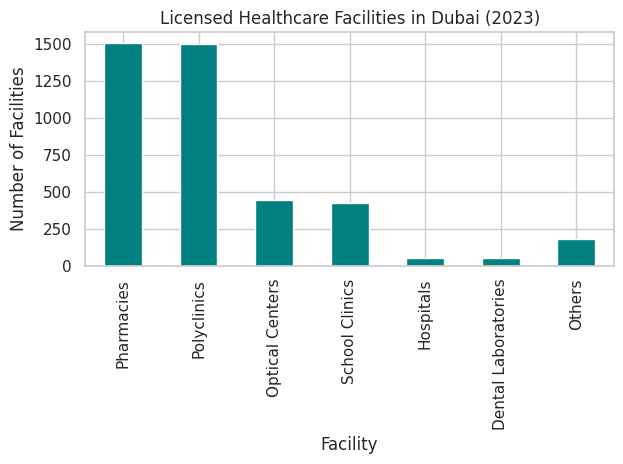

In [7]:
facilities = {
    "Facility": ['Pharmacies', 'Polyclinics', 'Optical Centers', 'School Clinics', 'Hospitals', 'Dental Laboratories', 'Others'],
    "Count": [1507, 1502, 444, 428, 55, 55, 178]
}
facilities_df = pd.DataFrame(facilities)
facilities_df.set_index("Facility")["Count"].plot(kind="bar", color='teal')
plt.title("Licensed Healthcare Facilities in Dubai (2023)")
plt.ylabel("Number of Facilities")
plt.tight_layout()
plt.show()


### Healthcare manpower composition

- Total healthcare workers: 60,988
- Females: 66.8%, Males: 33.2%
- Emiratis: 3.1%, Non-Emiratis: 96.9%
- Largest workforce group: Nurses (38.8%)
- Doctors: 21.7% of workforce (6.1% Emirati)

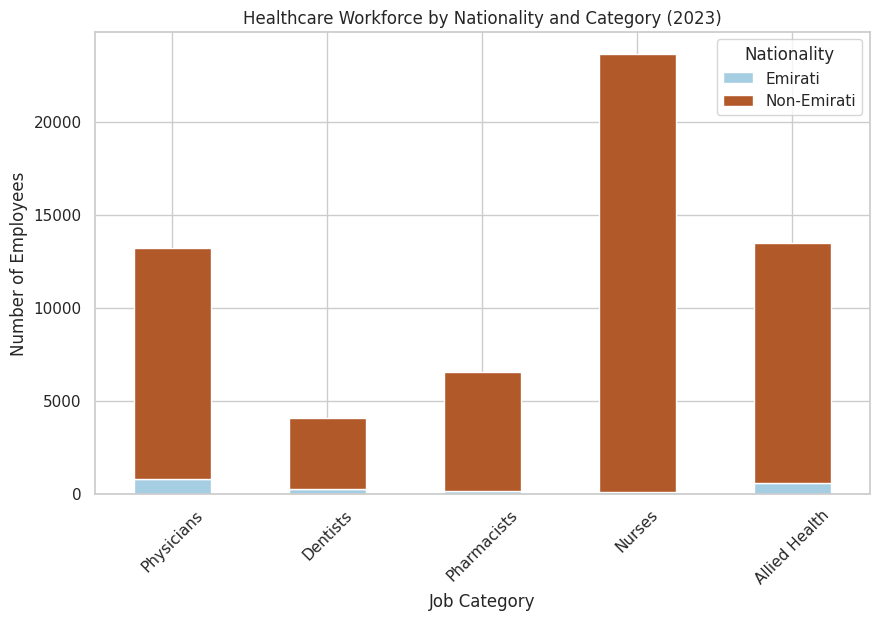

In [8]:
workforce = {
    "Category": ["Physicians","Dentists","Pharmacists","Nurses","Allied Health"],
    "Total": [13228, 4074, 6558, 23661, 13467],
    "Emirati": [812, 236, 142, 108, 577],
    "Non-Emirati": [12416, 3838, 6416, 23553, 12890],
}
workforce_df = pd.DataFrame(workforce)
workforce_df.set_index('Category')[['Emirati', 'Non-Emirati']].plot(kind='bar', stacked=True, figsize=(10,6), colormap='Paired')
plt.title('Healthcare Workforce by Nationality and Category (2023)')
plt.ylabel('Number of Employees')
plt.xlabel('Job Category')
plt.xticks(rotation=45)
plt.legend(title='Nationality')
plt.show()

In [9]:
# Calculate overall and by category
workforce_df["Emirati_pct"] = (workforce_df["Emirati"] / workforce_df["Total"] * 100).round(1)
workforce_df["Non_Emirati_pct"] = (workforce_df["Non-Emirati"] / workforce_df["Total"] * 100).round(1)
print(workforce_df[["Category","Total","Emirati","Non-Emirati","Emirati_pct","Non_Emirati_pct"]])

# Example: Overall Emirati percentage in health workforce
total_emirati = workforce_df['Emirati'].sum()
total_workers = workforce_df['Total'].sum()
overall_emirati_pct = total_emirati / total_workers * 100
print(f"Overall Emirati percentage in workforce: {overall_emirati_pct:.2f}%")


        Category  Total  Emirati  Non-Emirati  Emirati_pct  Non_Emirati_pct
0     Physicians  13228      812        12416          6.1             93.9
1       Dentists   4074      236         3838          5.8             94.2
2    Pharmacists   6558      142         6416          2.2             97.8
3         Nurses  23661      108        23553          0.5             99.5
4  Allied Health  13467      577        12890          4.3             95.7
Overall Emirati percentage in workforce: 3.07%


In [10]:

staff_df = pd.DataFrame({'Males':[7062,1764,3378,3482,4538], 'Females':[6166,2310,3180,20179,8929]}, index=['Physicians','Dentists','Pharmacists','Nurses','Allied Health'])

staff_totals = staff_df.sum()
male_pct = staff_totals['Males'] / (staff_totals['Males'] + staff_totals['Females']) * 100
female_pct = staff_totals['Females'] / (staff_totals['Males'] + staff_totals['Females']) * 100
print(f"Male: {male_pct:.2f}%, Female: {female_pct:.2f}%")


Male: 33.16%, Female: 66.84%


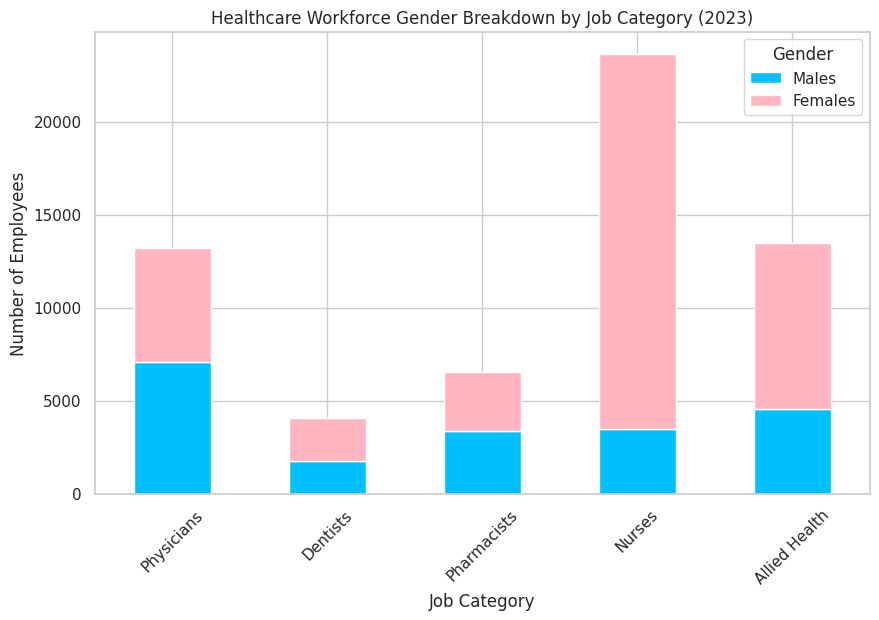

In [11]:
staff_df = pd.DataFrame({
    'Males':[7062,1764,3378,3482,4538],
    'Females':[6166,2310,3180,20179,8929]
}, index=['Physicians','Dentists','Pharmacists','Nurses','Allied Health'])

staff_df.plot(kind='bar', stacked=True, figsize=(10,6), color=['deepskyblue', 'lightpink'])
plt.title('Healthcare Workforce Gender Breakdown by Job Category (2023)')
plt.ylabel('Number of Employees')
plt.xlabel('Job Category')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

###**Age distribution in health workforce**




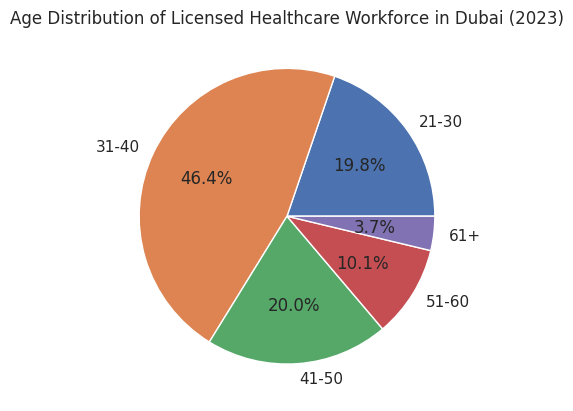

In [12]:
age_dist = {
    "Age Group": ["21-30", "31-40", "41-50", "51-60", "61+"],
    "Workforce": [12058, 28311, 12196, 6136, 2281],
}
age_df = pd.DataFrame(age_dist)
age_df.set_index("Age Group")["Workforce"].plot(kind="pie", autopct='%1.1f%%', legend=False)
plt.title("Age Distribution of Licensed Healthcare Workforce in Dubai (2023)")
plt.ylabel("")
plt.show()


---

## 7. Machine Learning Example: Forecasting Inpatient Admissions for 2024


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted inpatient admissions for 2024: 446,315


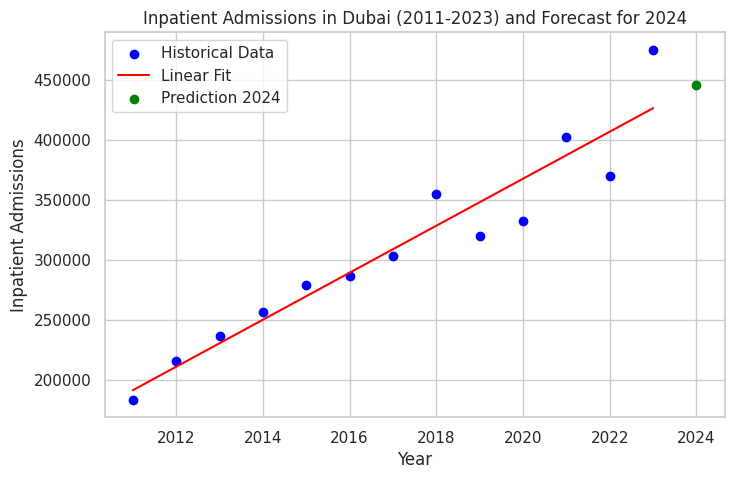

In [13]:
# Machine Learning Example: Forecasting Inpatient Admissions for 2024

import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Historical inpatient admissions data from 2011 to 2023
data_years = list(range(2011, 2024))
inpatient_visits = [
    183436, 216046, 236329, 256249, 278934, 286765, 303212, 355327,
    320220, 332393, 402666, 370464, 475465
]

# Create DataFrame
df = pd.DataFrame({
    'Year': data_years,
    'Inpatient_Admissions': inpatient_visits
})

# Feature: Year as numeric
df['Year_Num'] = df['Year'] - df['Year'].min()  # To reduce magnitude for better model fitting

# Prepare data for model
X = df[['Year_Num']]
y = df['Inpatient_Admissions']

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict inpatient admissions for 2024
year_2024_num = 2024 - df['Year'].min()
predicted_2024 = model.predict(np.array([[year_2024_num]]))[0]

print(f"Predicted inpatient admissions for 2024: {int(predicted_2024):,}")

# Optionally, display the fitted line together with historical data
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['Year'], y, color='blue', label='Historical Data')
plt.plot(df['Year'], model.predict(X), color='red', label='Linear Fit')
plt.scatter(2024, predicted_2024, color='green', label='Prediction 2024')
plt.title('Inpatient Admissions in Dubai (2011-2023) and Forecast for 2024')
plt.xlabel('Year')
plt.ylabel('Inpatient Admissions')
plt.legend()
plt.grid(True)
plt.show()



###**Implication:**
Planners should anticipate and provision for significant ongoing increase in service needs.

---


##KPI DASHBOARD- QUICK SUMMARY

In [14]:
total_emirati = workforce_df['Emirati'].sum()
total_workers = workforce_df['Total'].sum()
overall_emirati_pct = total_emirati / total_workers * 100

kpi = {
    "Indicator": [
        "Population (2023)", "Births (2023)", "Deaths (2023)",
        "Natural Increase (2023)", "Outpatient Visits (2023)",
        "Inpatient Visits (2023)", "Total Workforce", "Emirati Workforce (%)"
    ],
    "Value": [
        3655000, 36300, 3962, 32338, 12375578, 475465,
        total_workers, f"{overall_emirati_pct:.2f}%"
    ]
}
kpi_df = pd.DataFrame(kpi)
display(kpi_df)

,Indicator,Value
0,Population (2023),3655000
1,Births (2023),36300
2,Deaths (2023),3962
3,Natural Increase (2023),32338
4,Outpatient Visits (2023),12375578
5,Inpatient Visits (2023),475465
6,Total Workforce,60988
7,Emirati Workforce (%),3.07%


###1. Population Growth and Demographic KPIs
**Population Size and Growth Rate**:
Dubai's population increased to 3,655,000 in 2023, with an annual crude growth rate of 29.6 per 1,000—the change over the previous year reflects demographic dynamics critical for healthcare planning.

**Age and Gender Distribution**: A predominance of working-age groups (especially 25–44 years) indicating the primary population segments utilizing healthcare. Males represent about 68.6% of the population, females 31.4%.

###2. Birth and Mortality KPIs
**Birth Rate**: Total live births in 2023 were 36,300, with 99.9% taking place in hospitals, indicating strong institutional delivery coverage.

**Natural Population Increase**: The net natural increase (births minus deaths) was 32,338 in 2023, demonstrating positive population growth.

**Mortality Rate and Distribution**: Total deaths in 2023 were 3,962 with nearly equal male/female deaths among Emiratis and male dominance in non-Emirati deaths (76.8%). Deaths concentrated in specific age groups (e.g., Emirati males 35–50 years, Emirati females 65+ years).

###3. Patient Service KPIs
**Outpatient Visits**: 12,375,578 outpatient visits in 2023, increasing 3.0% from 2022; females slightly outnumber males in visits, and non-Emiratis constitute the majority (73.7%).

**Inpatient Admissions**: 475,465 admissions in 2023, a significant increase of 28.3% from last year, with more female inpatients (52.4%). Emiratis represent 17.9% of admissions.

**Age Distribution of Service Utilization**: Highest patient encounters in 25–44 years for both outpatient and inpatient services, reflecting healthcare demands aligned with demographic trends.

###4. Healthcare Resources KPIs
**Healthcare Facilities**: 4,958 licensed healthcare facilities with balanced distribution between pharmacies (30.4%) and polyclinics (30.4%), supporting broad access to healthcare services.

**Healthcare Workforce**: 60,988 licensed health professionals, predominately female (66.8%), with Emiratis comprising 3.1% of the workforce. Nurses form the largest group (38.8%) indicating a robust base of care providers.

***Summary of What KPIs Indicate***:

-*Population and Service Demand*: The growth in population coupled with increasing outpatient visits and inpatient admissions indicates rising healthcare service demands.

-*Balanced Gender and Age Group Utilization*: Service utilization aligns with population demographics, focusing on working-age adults, informing targeted resource allocation.

-*Strong Institutional Birth Coverage*: High hospital birth rates demonstrate access and utilization of maternal healthcare.

-*Workforce Composition*: The health sector employs a predominantly female and largely expatriate workforce, highlighting human resource structure and potential areas for Emiratization.

-*Growth in Healthcare Infrastructure*: Increase in healthcare facilities or service capacity (both outpatient and inpatient) is necessary to match population growth and usage trends.

These KPIs provide essential benchmarks for health authorities and policymakers to track healthcare access, resource allocation, service utilization, and population health trends within Dubai's healthcare system.

In [15]:
!pip install dash



In [16]:
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd

# Sample data
indicators = {
    'Population (2023)': 3655000,
    'Births (2023)': 36300,
    'Deaths (2023)': 3962,
    'Natural Increase (2023)': 32338,
    'Outpatient Visits (2023)': 12375578,
    'Inpatient Visits (2023)': 475465,
    'Total Workforce': 60988,
    'Emirati Workforce (%)': 3.07,
}

years = list(range(2011, 2024))
natural_increase = [27475, 27500, 28000, 28500, 29000, 29500, 30000, 30500, 31000, 31600, 32000, 31500, 32000]

df_natural = pd.DataFrame({
    'Year': years,
    'Natural Increase': natural_increase
})

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Dubai Healthcare Statistical Dashboard"),

    html.Div([
        html.Div([
            html.H4(key),
            html.P(f"{value:,}" + ("%" if '%' in key else ""))
        ], style={'border': '1px solid black', 'margin': '5px', 'padding': '10px', 'width': '200px', 'display': 'inline-block'})
        for key, value in indicators.items()
    ]),

    html.H2("Natural Increase Over Years"),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': str(year), 'value': year} for year in years],
        value=2023,
        clearable=False
    ),

    dcc.Graph(id='line-chart'),

    html.H2("Visits by Type in 2023"),
    dcc.Graph(
        figure=go.Figure(data=[
            go.Bar(name='Outpatient', x=['2023'], y=[indicators['Outpatient Visits (2023)']]),
            go.Bar(name='Inpatient', x=['2023'], y=[indicators['Inpatient Visits (2023)']]),
        ]).update_layout(barmode='group', yaxis_title="Number of Visits")
    ),
])

@app.callback(
    Output('line-chart', 'figure'),
    Input('year-dropdown', 'value')
)
def update_line_chart(selected_year):
    filtered_df = df_natural[df_natural['Year'] <= selected_year]
    fig = go.Figure(data=go.Scatter(x=filtered_df['Year'], y=filtered_df['Natural Increase'], mode='lines+markers'))
    fig.update_layout(title='Natural Population Increase', xaxis_title='Year', yaxis_title='Increase')
    return fig

# Run the Dash app inside the notebook - this requires Dash 2.11+
app.run(jupyter_mode='inline', debug=True, port=8050)


<IPython.core.display.Javascript object>